In [1]:
# import library

import pandas as pd

In [2]:
# load dataset

dataset=pd.read_csv("CSUSHPISA.csv")
dataset

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
435,2023-04-01,300.198
436,2023-05-01,302.620
437,2023-06-01,304.651
438,2023-07-01,306.634


# Standardization/ Normalizaton
# MinMax Scaler

In [3]:
# Time Series - Univariate

column="CSUSHPISA"

In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(dataset[[column]])
print("Len:",data1.shape)

Len: (440, 1)


In [5]:
len(data1)

440

# Split Training and Testing data using series of data

In [6]:
# x_train, x_test  - input training and testing data
# y_train, y_test  - output training and testing data

training_size = round(len(data1 ) * 0.80)  # Total -440
print(training_size)

X_train=data1[:training_size]              # first 0:352
X_test=data1[training_size:]               # 88: last
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)

y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

352
X_train length: (352, 1)
X_test length: (88, 1)
y_train length: (352, 1)
y_test length: (88, 1)


# Model Creation

In [7]:
# ! pip install stockFunctions

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# AutoRegressive Moving Average

orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(X_train, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
    #print(y_pred)    
    
    from sklearn import metrics
      
    # rmse - root mean squared error
    print("rmse :", metrics.mean_squared_error(y_test,y_pred))
    # mape - mean absolute percentage error
    print("mape :", metrics.mean_absolute_percentage_error(y_test,y_pred))
        
        
    print("************")

rmse : 0.5036980302965248
mape : 1.0
************
rmse : 0.501886536799481
mape : 0.9946462129119461
************
rmse : 0.07926568287759721
mape : 0.2786219265037103
************
rmse : 0.060241059309298794
mape : 0.2218428632090114
************


In [10]:
len(y_pred)


88

# Graph

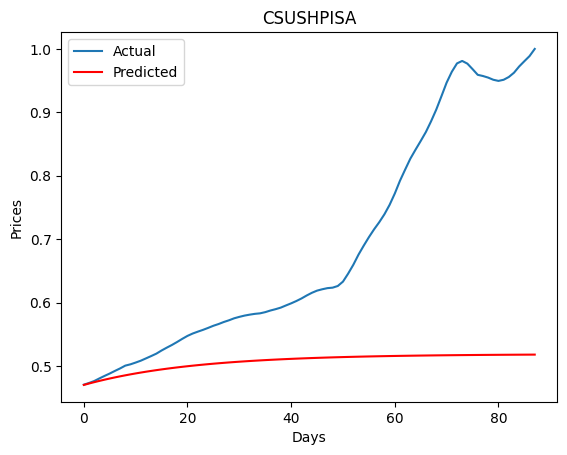

In [11]:
import matplotlib.pyplot as plt

# plt.plot("Actual ",y_test)
# plt.plot("Predicted ", y_pred,colors='red')
plt.title("CSUSHPISA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(y_test, label='Actual')
plt.plot(y_pred,color='red', label='Predicted')
plt.legend()
plt.show()

In [12]:
len(data1)

440

In [13]:
# Actual values

y_test

array([[0.47043868],
       [0.47310737],
       [0.47616312],
       [0.48030264],
       [0.48426697],
       [0.48804387],
       [0.49215487],
       [0.49609068],
       [0.50049096],
       [0.50256072],
       [0.50532719],
       [0.5083096 ],
       [0.5119439 ],
       [0.51559858],
       [0.51941623],
       [0.52435839],
       [0.52882386],
       [0.53308561],
       [0.53778332],
       [0.542754  ],
       [0.54738245],
       [0.55110231],
       [0.55409287],
       [0.55692046],
       [0.56004954],
       [0.56336605],
       [0.56609585],
       [0.56927791],
       [0.57198734],
       [0.57511235],
       [0.5773899 ],
       [0.57938632],
       [0.58089383],
       [0.5821528 ],
       [0.58296359],
       [0.58483371],
       [0.58740868],
       [0.58953141],
       [0.59198823],
       [0.59541067],
       [0.59871496],
       [0.60236148],
       [0.60642359],
       [0.61110907],
       [0.61534231],
       [0.61877697],
       [0.62092821],
       [0.622

In [14]:
# actual values -  y_test
# Convert minmax scaler into inverse_transform 

actual=Ms.inverse_transform(y_test)

In [15]:
# Predcted values

y_pred

array([0.47005702, 0.47227109, 0.47438442, 0.4764016 , 0.47832699,
       0.48016478, 0.48191895, 0.4835933 , 0.48519147, 0.48671692,
       0.48817297, 0.48956276, 0.49088932, 0.49215552, 0.4933641 ,
       0.4945177 , 0.49561881, 0.49666981, 0.497673  , 0.49863054,
       0.49954451, 0.5004169 , 0.50124959, 0.50204439, 0.50280303,
       0.50352716, 0.50421833, 0.50487806, 0.50550777, 0.50610882,
       0.50668253, 0.50723013, 0.50775282, 0.50825173, 0.50872793,
       0.50918247, 0.50961633, 0.51003045, 0.51042572, 0.51080301,
       0.51116313, 0.51150687, 0.51183496, 0.51214813, 0.51244705,
       0.51273237, 0.5130047 , 0.51326465, 0.51351276, 0.51374959,
       0.51397564, 0.51419141, 0.51439736, 0.51459393, 0.51478157,
       0.51496066, 0.51513161, 0.51529478, 0.51545053, 0.51559919,
       0.51574108, 0.51587652, 0.51600579, 0.51612919, 0.51624697,
       0.51635939, 0.51646669, 0.51656912, 0.51666688, 0.51676019,
       0.51684926, 0.51693428, 0.51701543, 0.51709288, 0.51716

In [16]:
# Reshape y_pred values

y_pred_reshape=y_pred.reshape(-1,1)
y_pred_reshape

array([[0.47005702],
       [0.47227109],
       [0.47438442],
       [0.4764016 ],
       [0.47832699],
       [0.48016478],
       [0.48191895],
       [0.4835933 ],
       [0.48519147],
       [0.48671692],
       [0.48817297],
       [0.48956276],
       [0.49088932],
       [0.49215552],
       [0.4933641 ],
       [0.4945177 ],
       [0.49561881],
       [0.49666981],
       [0.497673  ],
       [0.49863054],
       [0.49954451],
       [0.5004169 ],
       [0.50124959],
       [0.50204439],
       [0.50280303],
       [0.50352716],
       [0.50421833],
       [0.50487806],
       [0.50550777],
       [0.50610882],
       [0.50668253],
       [0.50723013],
       [0.50775282],
       [0.50825173],
       [0.50872793],
       [0.50918247],
       [0.50961633],
       [0.51003045],
       [0.51042572],
       [0.51080301],
       [0.51116313],
       [0.51150687],
       [0.51183496],
       [0.51214813],
       [0.51244705],
       [0.51273237],
       [0.5130047 ],
       [0.513

In [17]:
# predicted values -  y_pred
# Convert minmax scaler into inverse_transform 

predicted=Ms.inverse_transform(y_pred_reshape)
predicted

array([[179.33532433],
       [179.87874428],
       [180.3974385 ],
       [180.89253202],
       [181.36509867],
       [181.81616344],
       [182.24670466],
       [182.65765616],
       [183.04990928],
       [183.4243148 ],
       [183.78168478],
       [184.12279435],
       [184.44838336],
       [184.759158  ],
       [185.05579232],
       [185.33892972],
       [185.6091843 ],
       [185.86714224],
       [186.11336304],
       [186.34838073],
       [186.57270507],
       [186.78682261],
       [186.99119775],
       [187.18627377],
       [187.37247379],
       [187.55020167],
       [187.7198429 ],
       [187.88176541],
       [188.03632041],
       [188.18384312],
       [188.32465352],
       [188.45905701],
       [188.58734512],
       [188.70979609],
       [188.82667551],
       [188.93823689],
       [189.04472221],
       [189.14636242],
       [189.24337798],
       [189.33597931],
       [189.42436725],
       [189.50873353],
       [189.58926112],
       [189

In [18]:
from UserDefinedFns import conversionSingle
actual=Ms.inverse_transform(y_test)
actual_price=conversionSingle(actual,[column])
actual_price

,CSUSHPISA
0,179.429
1,180.084
2,180.834
3,181.85
4,182.823
...,...
83,300.198
84,302.62
85,304.651
86,306.634


In [19]:
from UserDefinedFns import conversionSingle
predicted=Ms.inverse_transform(y_pred_reshape)
predicted_price=conversionSingle(predicted,[column])
predicted_price

,CSUSHPISA
0,179.335324
1,179.878744
2,180.397438
3,180.892532
4,181.365099
...,...
83,191.02823
84,191.03962
85,191.050492
86,191.06087


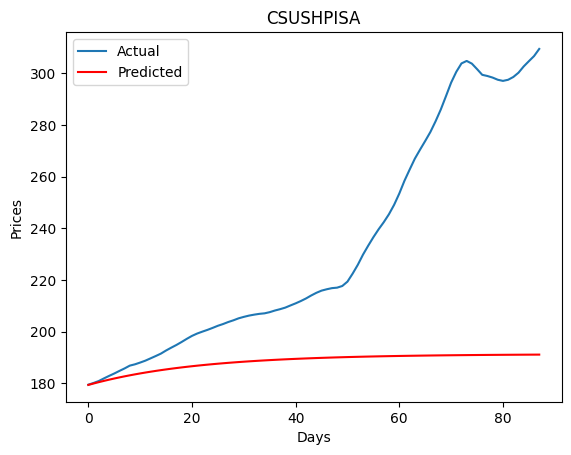

In [20]:
import matplotlib.pyplot as plt

plt.title("CSUSHPISA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(actual_price, label='Actual')
plt.plot(predicted_price,color='red', label='Predicted')
plt.legend()
plt.show()

# Evaluation Metrics

In [21]:
# Evaluation metrics for actual price and predicted price

# rmse - root mean squared error
print("rmse :", metrics.mean_squared_error(actual_price,predicted_price))
# mape - mean absolute percentage error
print("mape :", metrics.mean_absolute_percentage_error(actual_price,predicted_price))

rmse : 3628.939649025875
mape : 0.16679070360330772


# CSUSHPISA Forcasted for 5 days

In [22]:
# Time Series Analysis - Forcasting
# CSUSHPISA Forecast for 5 days 

forecast=model_fit.predict(len(data1), len(data1)+4)
forecast

array([0.51790966, 0.51794643, 0.51798152, 0.51801502, 0.51804699])

In [23]:
from UserDefinedFns import conversionSingle

forecastTable=conversionSingle(forecast,["Predicted_CSUSHPISA"])
forecast_price=Ms.inverse_transform(forecastTable)
Predicted_forecast_price=conversionSingle(forecast_price,["Predicted_CSUSHPISA"])
Predicted_forecast_price

,Predicted_CSUSHPISA
0,191.080229
1,191.089253
2,191.097867
3,191.106089
4,191.113936


In [24]:
Predicted_forecast_price.to_csv("Predicted_CSUSHPISA.csv",index=False)